# Data Description 
The following information is taken from UCI Machine Learning Repository:
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. Data shape is (542k,8)

Variable Description

InvoiceNo: Invoice number that consists of 6 digits.

StockCode: Product code that consists of 5 digits.

Description: Product name.

Quantity: The quantities of each product per transaction.

InvoiceDate: Represents the day and time when each transaction was generated.

UnitPrice: Product price per unit.

CustomerID: Customer number that consists 5 digits. Each customer has a unique customer ID.

Country: Name of the country where customer receive  the item.


# Step 0: Import necessary libraries

In [102]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import plotly.express as px # used for interactive visualizations

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from datetime import datetime, timedelta
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot # plot plotly graphs in line in a notebook
init_notebook_mode(connected = True)
import calendar # used to convert numbers between 1 and 12 to month names

import warnings        
warnings.filterwarnings("ignore") # ignores warnings
%matplotlib inline

# Step 1: Read Data

In [103]:
# Load data
df = pd.read_csv("C:\\Users\\aalsh\\OneDrive\\Documents\\New folder\\project\\data.csv",encoding='latin1')

In [104]:
# Take a look at the datatypes
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Step2: Clean Data

In [105]:
df.shape

(541909, 8)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# First: Clean DataSet - Columns

1-Replace dot --> Underscore

2-Strip white spaces

In [107]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [108]:
df.columns = df.columns.str.replace('.', '_').str.strip()

In [109]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# Second: Clean Dataset - Rows
1-Check dtypes

2-Check for missing

3-Check for duplicates



In [110]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [111]:
# Check dtypes
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [112]:
#Check missing 
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [113]:
#investigate records with a UnitPrice of 0.
df[df["UnitPrice"] == 0].shape

(2515, 8)

In [114]:
#drop records with a UnitPrice of 0
df = df[df["UnitPrice"] != 0]

In [115]:
#Check for duplicates
df.duplicated().sum()

5263

In [116]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132605
Country             0
dtype: int64

In [117]:
#check records with a negative UnitPrice
df[df["UnitPrice"] < 0].shape

(2, 8)

In [118]:
#ignore missing vlaues
df = df[df['UnitPrice'] >= 0]

In [119]:
#recheck for negative values
df[df["UnitPrice"] < 0].shape

(0, 8)

In [120]:
#check records with a negative Quantity
df[df["Quantity"] < 0].shape

(9288, 8)

In [121]:
df = df[df['Quantity'] >= 0]

In [122]:
#check records with a negative Quantity
df[df["Quantity"] < 0].shape

(0, 8)

# Step 3: EDA

In [123]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df['InvoiceDate'].apply(lambda x: x.date())
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [124]:
# create columns extracting the year and month of InvoiceDates
df["year"] = df["InvoiceDate"].dt.year
df["month"]= df["InvoiceDate"].dt.month

In [125]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [126]:
df.describe()

,Quantity,UnitPrice,CustomerID,year,month,TotalPrice
count,530104.000000,530104.000000,397884.000000,530104.000000,530104.000000,530104.000000
mean,10.542037,3.907625,15294.423453,2010.921751,7.560611,20.121871
std,155.524124,35.915681,1713.141560,0.268563,3.508496,270.356743
min,1.000000,0.001000,12346.000000,2010.000000,1.000000,0.001000
25%,1.000000,1.250000,13969.000000,2011.000000,5.000000,3.750000
50%,3.000000,2.080000,15159.000000,2011.000000,8.000000,9.900000
75%,10.000000,4.130000,16795.000000,2011.000000,11.000000,17.700000
max,80995.000000,13541.330000,18287.000000,2011.000000,12.000000,168469.600000


In [127]:
# View the correlations
df.corr()

,Quantity,UnitPrice,CustomerID,year,month,TotalPrice
Quantity,1.000000,-0.003773,-0.006232,0.003525,-0.002335,0.907338
UnitPrice,-0.003773,1.000000,-0.010873,-0.007396,0.000251,0.137404
CustomerID,-0.006232,-0.010873,1.000000,-0.036351,0.030439,-0.004109
year,0.003525,-0.007396,-0.036351,1.000000,-0.368667,0.000283
month,-0.002335,0.000251,0.030439,-0.368667,1.000000,0.000316
TotalPrice,0.907338,0.137404,-0.004109,0.000283,0.000316,1.000000


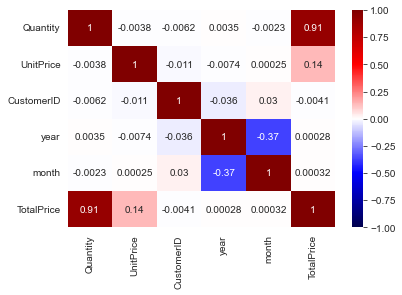

In [128]:
# example of a better corr matrix
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

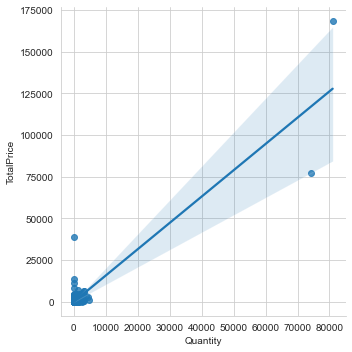

In [129]:
sns.lmplot(data = df, x= "Quantity", y ="TotalPrice")

# What are the Number of Orders for Each Country?

In [130]:
country_orders = pd.DataFrame(df.groupby("Country") \
["InvoiceNo"].count()).reset_index().sort_values("InvoiceNo",ascending = False)
country_orders.head()

,Country,InvoiceNo
36,United Kingdom,485123
14,Germany,9040
13,France,8407
10,EIRE,7890
31,Spain,2484


In [131]:

fig = px.pie(country_orders,
             values="InvoiceNo",
             names="Country",
             title="Percent of Total Orders by Country",
             color_discrete_sequence=px.colors.qualitative.G10
            )
# px.colors.qualitative.swatches().show() # see available color palettes

fig.update_traces(
                  textposition="inside",
                  textinfo="percent+label"
                 )
fig.update_layout(
                  margin=dict(l=10, r=50, b=10, t=70, pad=0),
                  titlefont = dict(size = 20)
                 )
iplot(fig)


# What is the Sales trend for Each Country?

In [132]:
country_sales = pd.DataFrame(df.groupby("Country") \
["TotalPrice"].sum()).reset_index().sort_values("TotalPrice",ascending = False)
country_sales.head()

,Country,TotalPrice
36,United Kingdom,9025222.084
24,Netherlands,285446.340
10,EIRE,283453.960
14,Germany,228867.140
13,France,209715.110


In [133]:
fig = px.pie(country_sales,
             values="TotalPrice",
             names="Country",
             title="Percent of Total Sales by Country",
             color_discrete_sequence=px.colors.qualitative.G10
            )
# px.colors.qualitative.swatches().show() # see available color palettes

fig.update_traces(
                  textposition="inside",
                  textinfo="percent+label"
                 )
fig.update_layout(
                  margin=dict(l=10, r=50, b=10, t=70, pad=0),
                  titlefont = dict(size = 20)
                 )
iplot(fig)


# What are the most popular 10 items?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(2, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(3, 0, 'PARTY BUNTING'),
  Text(4, 0, 'LUNCH BAG RED RETROSPOT'),
  Text(5, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(6, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
  Text(7, 0, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(8, 0, 'LUNCH BAG  BLACK SKULL.'),
  Text(9, 0, 'NATURAL SLATE HEART CHALKBOARD ')])

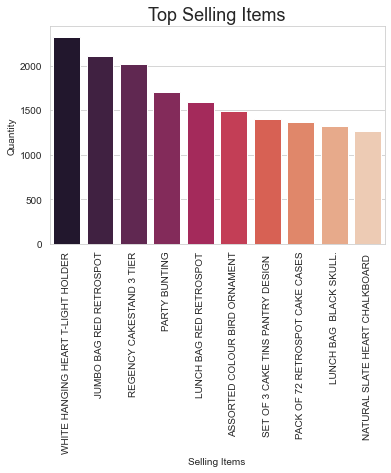

In [134]:
p=df.groupby('Description').count().sort_values("InvoiceNo",ascending = False)
p=p.head(10)

sns.barplot(p.index,p['Quantity'],palette = "rocket")
plt.xlabel('Selling Items')
plt.title("Top Selling Items", size=18)
plt.xticks(rotation=90)

# What are the least popular 10 items?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'PINK ALLIUM  ARTIFICIAL FLOWER'),
  Text(1, 0, 'VINTAGE BEAD PINK JEWEL STAND'),
  Text(2, 0, 'ETCHED GLASS STAR TREE DECORATION'),
  Text(3, 0, 'BAKING MOULD CUPCAKE CHOCOLATE'),
  Text(4, 0, 'ENAMEL MUG PANTRY'),
  Text(5, 0, 'BAKING MOULD TOFFEE CUP  CHOCOLATE'),
  Text(6, 0, 'ENAMEL DINNER PLATE PANTRY'),
  Text(7, 0, 'BAROQUE BUTTERFLY EARRINGS MONTANA'),
  Text(8, 0, 'BAROQUE BUTTERFLY EARRINGS RED'),
  Text(9, 0, 'PEARL & SHELL 42"NECKL. IVORY')])

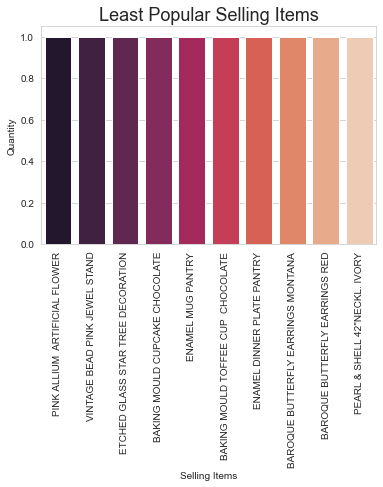

In [135]:
p=df.groupby('Description').count().sort_values("InvoiceNo",ascending = True)
p=p.head(10)

sns.barplot(p.index,p['Quantity'],palette = "rocket")
plt.xlabel('Selling Items')
plt.title("Least Popular Selling Items", size=18)
plt.xticks(rotation=90)

# Who are the 10 Most Valuable Customers?

In [136]:
Val_Customers = df.groupby("CustomerID").agg({"InvoiceNo": "nunique", "TotalPrice": "sum"}) \
.rename({"TotalPrice":"TotalPurchases","InvoiceNo":"Number_of_Orders"},axis = 1) \
.sort_values(by = "TotalPurchases", ascending = False)

# only first 10
Val_Customers=Val_Customers.head(10) 
Val_Customers

,Number_of_Orders,TotalPurchases
CustomerID,,
14646.0,73,280206.02
18102.0,60,259657.30
17450.0,46,194550.79
16446.0,2,168472.50
14911.0,201,143825.06
12415.0,21,124914.53
14156.0,55,117379.63
17511.0,31,91062.38
16029.0,63,81024.84


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '14646.0'),
  Text(1, 0, '18102.0'),
  Text(2, 0, '17450.0'),
  Text(3, 0, '16446.0'),
  Text(4, 0, '14911.0'),
  Text(5, 0, '12415.0'),
  Text(6, 0, '14156.0'),
  Text(7, 0, '17511.0'),
  Text(8, 0, '16029.0'),
  Text(9, 0, '12346.0')])

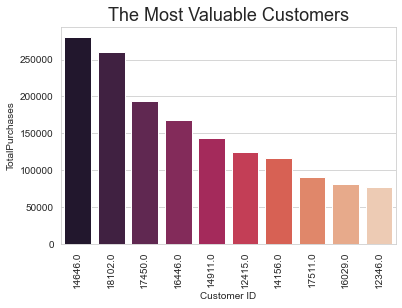

In [137]:
plot_order = df.groupby("CustomerID").agg({"InvoiceNo": "nunique", "TotalPrice": "sum"}) \
.rename({"TotalPrice":"TotalPurchases","InvoiceNo":"Number_of_Orders"},axis = 1) \
.sort_values(by = "TotalPurchases", ascending = False).index.values

sns.barplot(x=Val_Customers.index,y=Val_Customers['TotalPurchases'] ,
            order = plot_order[0:10], palette = "rocket")
plt.xlabel('Customer ID')
plt.title("The Most Valuable Customers", size=18)
plt.xticks(rotation=90)

# How much is the revenue for each month?

In [138]:
salespermonth = df.groupby(["year","month"])["TotalPrice"].sum() \
.reset_index().rename({"TotalPrice":"Revenue"},axis=1)

salespermonth

,year,month,Revenue
0,2010,12,823746.140
1,2011,1,691364.560
2,2011,2,523631.890
3,2011,3,717639.360
4,2011,4,537808.621
5,2011,5,770536.020
6,2011,6,761739.900
7,2011,7,719221.191
8,2011,8,759138.380
9,2011,9,1058590.172


Text(0.5, 1.0, 'Revenue per Month')

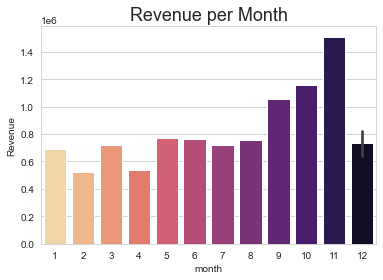

In [139]:

sns.set_style("whitegrid")
sns.barplot(data=salespermonth, x='month', y='Revenue', palette='magma_r').title.set_text('Revenue per Month')
plt.title("Revenue per Month", size=18)


### How many customers are the Best Customers?

### How many customers are the Loyal Customers?

### How many customers are the Big Spenders?

### How many customers are at risk of churning?

### How many customers are Almost Churned Customers? 

### How many customers are Churned Customers

# RFM analysis

Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:

Recency: How recently a customer has made a purchase

Frequency: How often a customer makes a purchase

Monetary Value: How much money a customer spends on purchases

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.
  

In [140]:
monetary = df.groupby('CustomerID')['TotalPrice'].sum()
monetary = pd.DataFrame(monetary).reset_index()
monetary.head()

,CustomerID,TotalPrice
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [141]:
freq = df.drop_duplicates(subset=['InvoiceNo']).groupby('CustomerID')['InvoiceNo'].count()
freq = pd.DataFrame(freq).reset_index()
freq.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [142]:
today = df['Date'].max()
today

datetime.date(2011, 12, 9)

In [143]:
recency = df.groupby('CustomerID').agg({'Date': lambda x: (today - x.max()).days})
recency.head()

,Date
CustomerID,
12346.0,325
12347.0,2
12348.0,75
12349.0,18
12350.0,310


In [144]:
#rfm table
rfm_df = freq.merge(monetary, on='CustomerID').merge(recency, on='CustomerID')
rfm_df.columns = ['CustomerId', 'freq', 'monetary', 'recency']
rfm_df.head()

,CustomerId,freq,monetary,recency
0,12346.0,1,77183.60,325
1,12347.0,7,4310.00,2
2,12348.0,4,1797.24,75
3,12349.0,1,1757.55,18
4,12350.0,1,334.40,310


In [145]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,CustomerId,freq,monetary,recency
0.25,13813.25,1.0,307.415,17.00
0.50,15299.50,2.0,674.485,50.00
0.75,16778.75,5.0,1661.740,141.75


In [146]:

# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [147]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [148]:
def MScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [149]:
# Create rfm segmentation table
rfm_seg = rfm_df
rfm_seg['Recent_Quartile'] = rfm_seg['recency'].apply(RScore, args=('recency',quantiles,))
rfm_seg['Freq_Quartile'] = rfm_seg['freq'].apply(FScore, args=('freq',quantiles,))
rfm_seg['Mone_Quartile'] = rfm_seg['monetary'].apply(MScore, args=('monetary',quantiles,))

rfm_seg['RFMScore'] = rfm_seg.Recent_Quartile.map(str) + rfm_seg.Freq_Quartile.map(str) + rfm_seg.Mone_Quartile.map(str)

rfm_seg.head()

,CustomerId,freq,monetary,recency,Recent_Quartile,Freq_Quartile,Mone_Quartile,RFMScore
0,12346.0,1,77183.60,325,1,1,4,114
1,12347.0,7,4310.00,2,4,4,4,444
2,12348.0,4,1797.24,75,2,3,4,234
3,12349.0,1,1757.55,18,3,1,4,314
4,12350.0,1,334.40,310,1,1,2,112


In [150]:
#performing clustering of unlabeled data thorugh sklearn.cluster module
from sklearn.preprocessing import MinMaxScaler
X = rfm_df.values
normalizer = MinMaxScaler()
x_scaled = normalizer.fit_transform(X)
rfm_df = pd.DataFrame(x_scaled, columns = rfm_df.columns)

In [151]:
print("Best Customers: ",len(rfm_seg[rfm_seg['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_seg[rfm_seg['Freq_Quartile']==4]))
print("Big Spenders: ",len(rfm_seg[rfm_seg['Mone_Quartile']==4]))
print('Customers at risk of churning: ', len(rfm_seg[rfm_seg['RFMScore']=='244']))
print('Almost Churned Customers: ',len(rfm_seg[rfm_seg['RFMScore']=='144']))
print('Churned Customers: ',len(rfm_seg[rfm_seg['RFMScore']=='111']))

Best Customers:  456
Loyal Customers:  872
Big Spenders:  1085
Customers at risk of churning:  70
Almost Churned Customers:  10
Churned Customers:  444


# Step 4: Modeling

In [234]:
#Code to Build K-Menas model
km = KMeans( n_clusters= 5,#K
            init = 'random',
            max_iter = 150,
            random_state = 42 
           )

In [235]:
#Code to Apply K-Means Model
y_km = km.fit_predict(X)

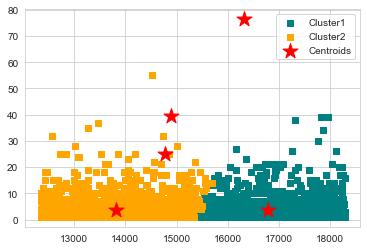

In [236]:
#Plot the Kmeans CLusters 

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], 
           c='teal', marker = 's', label = "Cluster1")

plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], 
           c='orange', marker = 's', label = "Cluster2")

#plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], 
 #          c='grey', marker = 's', label = "Cluster3")

#plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], 
#            c='blue', marker = 's', label = "Cluster4")
#Plot the centroids
plt.scatter (km.cluster_centers_[:,0], km.cluster_centers_[:,1],
            marker = '*', label = "Centroids", 
            c = 'red', s = 250)

plt.legend()
plt.show()

In [237]:
elbows = []
for i in range(1,16):
    km = KMeans(n_clusters= i,#K
            init = 'random',
            max_iter = 150,
            random_state = 42 
           )
    km.fit(X)
#     print(km.inertia_)
    elbows.append(km.inertia_)

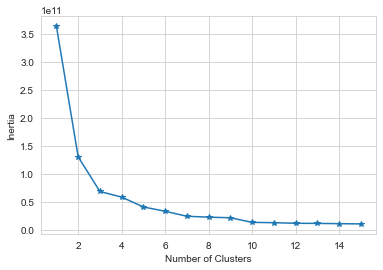

In [238]:
#     Plot Result of For loop
plt.plot(range(1,16),  elbows, marker = "*")
plt.xlabel('Number of Clusters')
plt.ylabel("Inertia")
plt.show()

In [249]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

km_model = KMeans(n_clusters = 3, init = 'random')
y_km = km_model.fit_predict(rfm_df)
km_score = silhouette_score(rfm_df, y_km)
km_score

0.3271561226214497

In [250]:
from sklearn.cluster import MiniBatchKMeans
mini_model = MiniBatchKMeans(3)
y_mini = mini_model.fit_predict(rfm_df)
mini_score =silhouette_score(rfm_df, y_mini)
mini_score

0.29162994143164617

In [251]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

db_model = DBSCAN(eps = 0.1, min_samples = 3)
y_db = db_model.fit_predict(rfm_df)
db_score = silhouette_score(rfm_df, y_db)
db_score

0.13694992789848492

In [252]:
from sklearn.cluster import SpectralClustering

spec_model = SpectralClustering(n_clusters=3)
y_spec = spec_model.fit_predict(rfm_df)
spec_score = silhouette_score(rfm_df, y_spec)
spec_score

0.3242480461845001

In [253]:
from sklearn.cluster import MeanShift
MS = MeanShift(bandwidth= 0.1)
y_MS = MS.fit_predict(rfm_df)
MS_score = silhouette_score(rfm_df, y_MS)
MS_score

0.43397631797492947

In [254]:
Scores = {'km_score': km_score, 
          'mini_score': mini_score,
          "db_score" : db_score, 
          "spec_score": spec_score,
          'MS_score': MS_score
         }

In [255]:
Scores

{'km_score': 0.3271561226214497,
 'mini_score': 0.29162994143164617,
 'db_score': 0.13694992789848492,
 'spec_score': 0.3242480461845001,
 'MS_score': 0.43397631797492947}

# Step 5: Conclusion